# Simultaneous Conjugate Match from S-Parameters

> Ref:
> * https://github.com/M0YCX/ycx_rf_amplifiers/blob/master/docs/s_params/simultaneous_conjugate_match.md

S-Parameters: (from datasheet or measurement)
s11S:-0.38042+0.12361j : [mag:0.40000} ∠162.00000]
s22S:0.27200-0.22026j : [mag:0.35000} ∠-39.00000]
s12S:0.02000+0.03464j : [mag:0.04000} ∠60.00000]
s21S:2.36075+4.63323j : [mag:5.20000} ∠63.00000]
Stability Factor:
$D_S$S:0.03704-0.05703j : [mag:0.06800} ∠-57.00000]
Rollett $K$1.736✓
Maximum Available Gain:
$MAG$16.1 dB
vs the Intrinsic Forward Gain $dB$14.3 dB


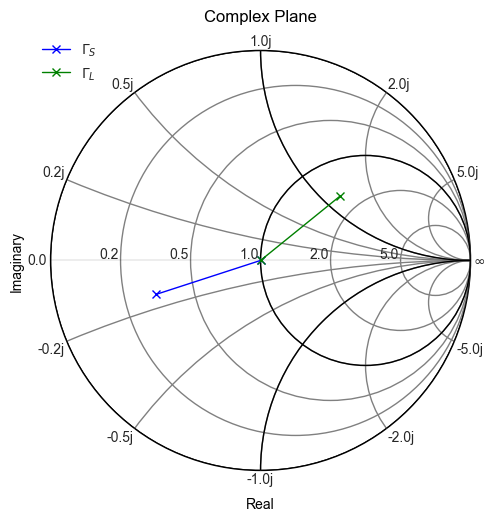

In [1]:
import sys

# %matplotlib widget
from ycx_complex_numbers import S, Z

sys.path.append("../../lib")
from nb_s_params import nb_calc_simultaneous_conjugate_match

cj = nb_calc_simultaneous_conjugate_match(
    s11=S().from_polar(0.4, 162),
    s22=S().from_polar(0.35, -39),
    s21=S().from_polar(5.2, 63),
    s12=S().from_polar(0.04, 60),
    title="Test Example",
    # Z0=Z(50 + 0j),
)

S-Parameters: (from datasheet or measurement)
s11S:0.33742+0.03088j : [mag:0.33883} ∠5.22862]
s22S:0.97264-0.06989j : [mag:0.97515} ∠-4.10976]
s12S:0.02114+0.01100j : [mag:0.02383} ∠27.49386]
s21S:0.64311-0.06101j : [mag:0.64600} ∠-5.41952]
Stability Factor:
$D_S$S:0.31608+0.00067j : [mag:0.31608} ∠0.12063]
Rollett $K$1.110✓
Maximum Available Gain:
$MAG$12.3 dB
vs the Intrinsic Forward Gain $dB$-3.8 dB


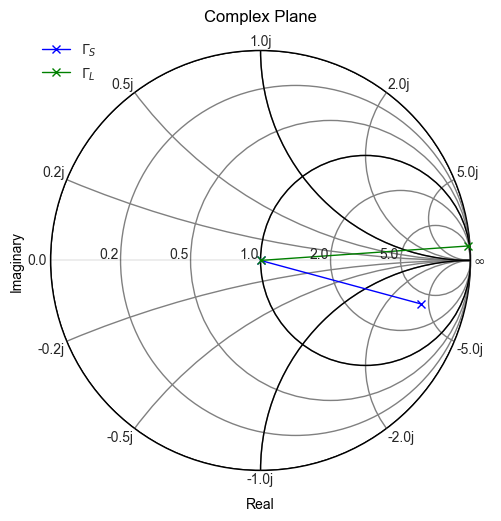

In [9]:
import skrf as rf
from skrf import Network

n = Network("/home/bev/.SimNEC/2/3/D20240819_mixer_buffer_jfet_amp_1mH.s2p")

freq = "10.8mhz"
s11 = n.s11[freq].s[0][0][0]
s22 = n.s22[freq].s[0][0][0]
s12 = n.s12[freq].s[0][0][0]
s21 = n.s21[freq].s[0][0][0]

cj = nb_calc_simultaneous_conjugate_match(
    s11=S(s11),
    s22=S(s22),
    s21=S(s21),
    s12=S(s12),
    title=f"J310 FET Post Mixer Buffer Amp @{freq}",
)